# Scikit-learn: Basic Features

In [11]:
#estimator (RandomForestClassifier) fitted to basic data
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
x = [[1,2,3],
     [11,12,13]]
y = [0,1]
clf.fit(x,y)

RandomForestClassifier(random_state=0)

In [17]:
#fitted estimator used to predict target values for new data
print(clf.predict(x))
print(clf.predict([[2,4,6],[13,15,18]]))

[0 1]
[0 1]


In [19]:
#rather than predict, transform outputs transformed sample matrix
from sklearn.preprocessing import StandardScaler
x = [[0,15],
     [1,-10]]
StandardScaler().fit(x).transform(x)

array([[-1.,  1.],
       [ 1., -1.]])

In [23]:
#transformers and estimators ---> Pipeline
#pipeline is the unification of the two
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

#splits dataset into random train and test sets
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [25]:
#used as estimator with predict
accuracy_score(pipe.predict(X_test), y_test)

0.9736842105263158

# K-Means Clustering

In [33]:
#Example used from datacamp.com 
import pandas as pd

home_data = pd.read_csv('housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


In [38]:
#sklearn used to split data into train and test sets
#then data is normalized using preprocessing.normalize() function
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [55]:
#num of clusters chosen (KMeans), num of c
#model fit to normalized trainign data with fit()
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

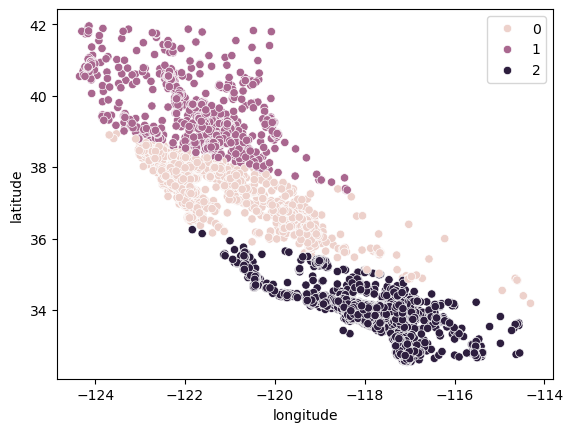

In [60]:
#visualization of data using seaborn
import seaborn as sns
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

In [ ]:
#How many clusters needed can't be known from running the model
#Ranges should be tested to decided best number of clusters for the data